## Data

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
train_dataset = MNIST(root = '../DanielBourke/MNIST_data', download = False, train = True)

In [3]:
len(train_dataset)

60000

In [4]:
test_dataset = MNIST(root = '../DanielBourke/MNIST_data', download = False, train = False)

In [5]:
len(test_dataset)

10000

### Data Visualization

In [6]:
train_dataset[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x105432EE0>, 5)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

image.shape: torch.Size([1, 28, 28])
Label: 5


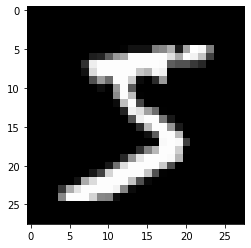

In [64]:
image, label = train_dataset[0]
print('image.shape:', image.shape)
plt.imshow(image.permute(1, 2, 0), cmap='gray')
print('Label:', label)

image shape:  torch.Size([1, 28, 28])
label:  7


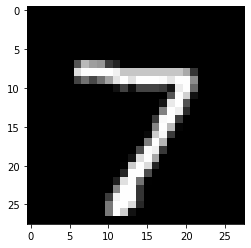

In [65]:
image, label = test_dataset[0]
print('image shape: ',image.shape)
plt.imshow(image.permute(1,2,0), cmap='gray')
print('label: ', label)

### Transforming data

In [10]:
from torchvision.transforms import transforms

In [11]:
train_dataset = MNIST(root = '../DanielBourke/MNIST_data', download = False, train = True,
                     transform = transforms.ToTensor())

In [12]:
test_dataset = MNIST(root = '../DanielBourke/MNIST_data', download = False, train = False,transform = transforms.ToTensor())

In [13]:
image_tensor, label = train_dataset[0]
image_tensor.shape, label

(torch.Size([1, 28, 28]), 5)

In [14]:
print(image_tensor[0,10:15,10:15])
print(torch.max(image_tensor), torch.min(image_tensor))

tensor([[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
        [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
        [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
        [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
        [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]])
tensor(1.) tensor(0.)


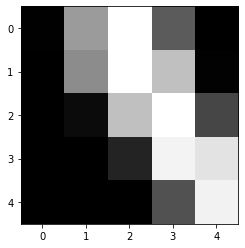

In [15]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(image_tensor[0,10:15,10:15], cmap='gray');

### Splitting data

In [16]:
from torch.utils.data import random_split

In [66]:
train_ds, valid_ds = random_split(train_dataset, [50000, 10000])
len(train_ds), len(valid_ds)

(50000, 10000)

### Dataloader

In [19]:
from torch.utils.data import DataLoader

In [67]:
batch_size = 128

In [73]:
train_dl = DataLoader(train_ds, batch_size = batch_size, shuffle = True)
valid_dl = DataLoader(valid_ds, batch_size = batch_size*2)

### Visualization of a batch of image

In [74]:
from torchvision.utils import make_grid

Image shape:  torch.Size([128, 1, 28, 28])


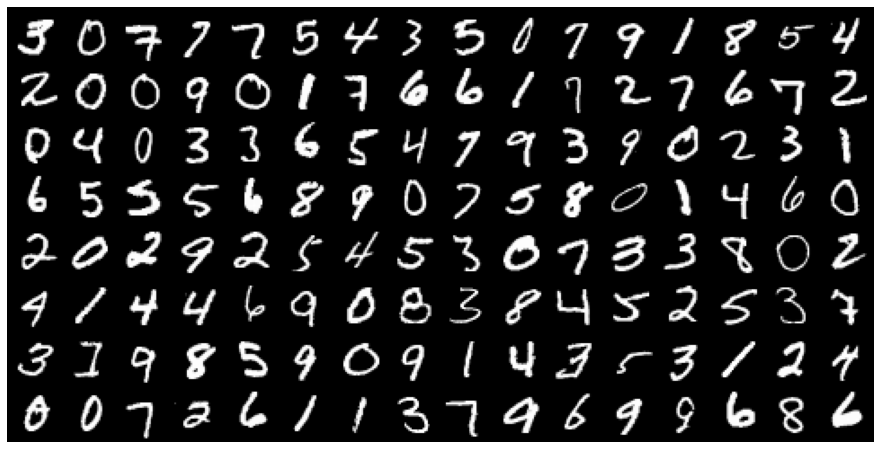

In [75]:
for image, _ in train_dl:
    print('Image shape: ', image.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute(1,2,0))
    break

### Model Creation

In [76]:
import torch.nn as nn

In [77]:
input_size = 1*28*28
num_classes = 10

model = nn.Linear(in_features=input_size, out_features=num_classes)

In [78]:
model.state_dict()

OrderedDict([('weight',
              tensor([[ 0.0320,  0.0044,  0.0014,  ...,  0.0148, -0.0164,  0.0027],
                      [-0.0067,  0.0174,  0.0124,  ...,  0.0297, -0.0055,  0.0152],
                      [-0.0318,  0.0304, -0.0349,  ..., -0.0179, -0.0331, -0.0142],
                      ...,
                      [ 0.0284, -0.0003,  0.0062,  ..., -0.0182, -0.0231, -0.0353],
                      [ 0.0209, -0.0118, -0.0164,  ..., -0.0158,  0.0058, -0.0054],
                      [ 0.0246, -0.0132,  0.0074,  ...,  0.0316, -0.0239, -0.0040]])),
             ('bias',
              tensor([ 0.0012,  0.0339,  0.0052, -0.0006,  0.0027,  0.0157,  0.0147, -0.0084,
                       0.0036,  0.0216]))])

In [79]:
model.weight.shape, model.bias.shape

(torch.Size([10, 784]), torch.Size([10]))

In [80]:
for image, label in train_dl:
    print(image.shape)
    print(label.dtype)
    break

torch.Size([128, 1, 28, 28])
torch.int64


In [81]:
image.reshape(128,784).shape

torch.Size([128, 784])

### Custom model

In [82]:
input_size = 784
num_classes = 10

In [83]:
class Mnist_model(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.linear_1 = nn.Linear(in_features=input_size, out_features=16)
        self.linear_2 = nn.Linear(in_features=16, out_features=num_classes)
        self.relu = nn.ReLU()
    
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear_2(self.relu(self.linear_1(xb)))
        return out

In [84]:
model = Mnist_model()

In [85]:
model.state_dict()

OrderedDict([('linear_1.weight',
              tensor([[-0.0108, -0.0229, -0.0205,  ...,  0.0174,  0.0354,  0.0083],
                      [ 0.0336,  0.0146,  0.0133,  ..., -0.0211,  0.0056,  0.0232],
                      [ 0.0242,  0.0153, -0.0203,  ..., -0.0334,  0.0087, -0.0111],
                      ...,
                      [-0.0315,  0.0312,  0.0297,  ..., -0.0245, -0.0049,  0.0253],
                      [ 0.0023, -0.0045, -0.0325,  ..., -0.0063,  0.0055, -0.0101],
                      [ 0.0138, -0.0351, -0.0348,  ...,  0.0274, -0.0009,  0.0227]])),
             ('linear_1.bias',
              tensor([-0.0343, -0.0206, -0.0138, -0.0259,  0.0067, -0.0139, -0.0034,  0.0150,
                      -0.0098,  0.0347,  0.0179, -0.0204,  0.0220,  0.0029, -0.0341,  0.0013])),
             ('linear_2.weight',
              tensor([[-0.2396,  0.1985, -0.0316, -0.0621,  0.0683,  0.1052, -0.1163,  0.2496,
                       -0.1087,  0.1776,  0.2192,  0.1063, -0.0345, -0.0814, -0.150

### example test

In [86]:
for images, labels in train_dl:
    print(images.shape)
    out = model(images)
    print(out.shape)
    break

torch.Size([128, 1, 28, 28])
torch.Size([128, 10])


In [87]:
import torch.nn.functional as F

In [88]:
### output logits
logits = F.softmax(out, dim=1)
logits, logits.shape

(tensor([[0.1035, 0.0881, 0.0888,  ..., 0.0745, 0.0903, 0.1262],
         [0.1161, 0.0901, 0.1078,  ..., 0.0696, 0.0932, 0.1188],
         [0.1112, 0.0889, 0.0922,  ..., 0.0754, 0.0890, 0.1197],
         ...,
         [0.1089, 0.0968, 0.0979,  ..., 0.0695, 0.0903, 0.1298],
         [0.0968, 0.1011, 0.0884,  ..., 0.0806, 0.0897, 0.1287],
         [0.1042, 0.0977, 0.0936,  ..., 0.0635, 0.0895, 0.1296]],
        grad_fn=<SoftmaxBackward0>),
 torch.Size([128, 10]))

In [89]:
print('sample logits: ', logits[0].data)
print('sum', torch.sum(logits[0]).item())

sample logits:  tensor([0.1035, 0.0881, 0.0888, 0.0750, 0.1439, 0.1160, 0.0937, 0.0745, 0.0903,
        0.1262])
sum 1.0


`torch.max` returns each row's largest element and the corresponding index.

In [90]:
max_probs, preds = torch.max(logits, dim=1)
print(preds)
print(max_probs)
print(logits[0])

tensor([4, 9, 4, 9, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 9, 4, 9, 5, 9, 9,
        9, 9, 4, 5, 9, 9, 4, 9, 4, 4, 9, 9, 9, 5, 4, 4, 9, 5, 5, 5, 9, 4, 0, 9,
        4, 9, 9, 9, 5, 4, 5, 4, 0, 4, 9, 9, 9, 4, 9, 9, 4, 4, 4, 4, 4, 4, 0, 9,
        0, 4, 9, 4, 9, 5, 4, 9, 5, 9, 4, 4, 4, 4, 4, 9, 5, 4, 4, 5, 9, 5, 9, 4,
        4, 5, 9, 9, 4, 5, 9, 9, 4, 9, 4, 9, 5, 4, 9, 4, 9, 5, 5, 5, 5, 9, 9, 5,
        4, 5, 4, 9, 4, 9, 9, 9])
tensor([0.1439, 0.1188, 0.1228, 0.1311, 0.1320, 0.1301, 0.1249, 0.1377, 0.1230,
        0.1504, 0.1365, 0.1305, 0.1249, 0.1357, 0.1235, 0.1323, 0.1221, 0.1363,
        0.1201, 0.1407, 0.1273, 0.1203, 0.1266, 0.1242, 0.1206, 0.1247, 0.1212,
        0.1231, 0.1253, 0.1173, 0.1391, 0.1243, 0.1265, 0.1419, 0.1317, 0.1223,
        0.1249, 0.1280, 0.1283, 0.1229, 0.1168, 0.1316, 0.1386, 0.1290, 0.1278,
        0.1321, 0.1229, 0.1160, 0.1230, 0.1244, 0.1292, 0.1249, 0.1233, 0.1412,
        0.1229, 0.1249, 0.1196, 0.1353, 0.1249, 0.1231, 0.1243, 0.1328, 0.1266,
       

In [91]:
### Output shape should be [10]
preds

tensor([4, 9, 4, 9, 4, 9, 9, 4, 4, 4, 4, 4, 4, 4, 9, 4, 9, 4, 9, 4, 9, 5, 9, 9,
        9, 9, 4, 5, 9, 9, 4, 9, 4, 4, 9, 9, 9, 5, 4, 4, 9, 5, 5, 5, 9, 4, 0, 9,
        4, 9, 9, 9, 5, 4, 5, 4, 0, 4, 9, 9, 9, 4, 9, 9, 4, 4, 4, 4, 4, 4, 0, 9,
        0, 4, 9, 4, 9, 5, 4, 9, 5, 9, 4, 4, 4, 4, 4, 9, 5, 4, 4, 5, 9, 5, 9, 4,
        4, 5, 9, 9, 4, 5, 9, 9, 4, 9, 4, 9, 5, 4, 9, 4, 9, 5, 5, 5, 5, 9, 9, 5,
        4, 5, 4, 9, 4, 9, 9, 9])

In [92]:
labels

tensor([0, 1, 6, 5, 8, 6, 3, 0, 2, 4, 0, 3, 2, 0, 2, 9, 1, 0, 1, 4, 1, 6, 5, 2,
        7, 5, 6, 7, 3, 1, 0, 5, 8, 0, 0, 7, 7, 6, 3, 0, 1, 4, 7, 6, 9, 2, 8, 3,
        2, 0, 3, 1, 7, 0, 5, 4, 1, 4, 3, 3, 8, 4, 1, 4, 8, 2, 8, 4, 8, 6, 4, 0,
        1, 0, 2, 9, 2, 0, 0, 1, 6, 1, 7, 9, 3, 2, 0, 9, 3, 0, 8, 3, 3, 7, 9, 3,
        0, 4, 5, 8, 8, 7, 3, 0, 9, 1, 5, 1, 6, 6, 9, 5, 8, 2, 8, 5, 6, 1, 8, 6,
        0, 9, 0, 6, 0, 7, 3, 6])

In [93]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [94]:
accuracy(logits, labels)

tensor(0.0938)

In [95]:
# loss_fn = nn.CrossEntropyLoss()
loss_fn = F.cross_entropy

In [96]:
loss = loss_fn(logits, labels)
loss

tensor(2.3033, grad_fn=<NllLossBackward0>)

### Custom Function and Final custom Model

In [97]:
def fit(epochs, lr, model, train_dl, valid_dl, opt_func = torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr=lr)
    history = []
    
    for epoch in range(epochs):
        for batch in train_dl:
            model.train()
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        model.eval()
        with torch.inference_mode():
            result = evaluate(model, valid_dl)
            model.epoch_end(epoch, result)
            history.append(result)
    return history

In [98]:
def evaluate(model, valid_dl):
    valid_pred = [model.validation_step(batch) for batch in valid_dl]
    return model.validation_epoch_end(valid_pred)

In [99]:
class Mnist_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_1 = nn.Linear(in_features=input_size, out_features=16)
        self.linear_2 = nn.Linear(in_features=16, out_features=num_classes)
        self.relu = nn.ReLU()
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear_2(self.relu(self.linear_1(xb)))
        return out
    
    def training_step(self, batch):
        images, labels = batch
        logits = self(images)
        loss = F.cross_entropy(logits, labels)
        acc = accuracy(logits, labels)
        return loss
    
    def validation_step(self,batch):
        images, labels = batch
        logits = self(images)
        loss = F.cross_entropy(logits,labels)
        acc = accuracy(logits, labels)
        return {'val_loss':loss, 'val_accuracy': acc}
    
    def validation_epoch_end(self, valid_pred):
        batch_losses = [x['val_loss'] for x in valid_pred]
        valid_loss = torch.stack(batch_losses).mean()
        batch_accs = [x['val_accuracy'] for x in valid_pred]
        valid_acc = torch.stack(batch_accs).mean()
        return {'valid_loss': valid_loss.item(), 'valid_accuracy': valid_acc}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}] | valid_loss: {:.4f} | valid_acc: {:.4f}".format(epoch, result['valid_loss'], result['valid_accuracy']))

In [100]:
model = Mnist_model()

In [102]:
result0 = evaluate(model, valid_dl)
result0

{'valid_loss': 2.33596134185791, 'valid_accuracy': tensor(0.0970)}

In [103]:
for t in model.parameters():
    print(t.shape)

torch.Size([16, 784])
torch.Size([16])
torch.Size([10, 16])
torch.Size([10])


In [104]:
history1 = fit(5, 0.1, model, train_dl, valid_dl)

Epoch [0] | valid_loss: 0.3674 | valid_acc: 0.8931
Epoch [1] | valid_loss: 0.3194 | valid_acc: 0.9072
Epoch [2] | valid_loss: 0.2879 | valid_acc: 0.9180
Epoch [3] | valid_loss: 0.2757 | valid_acc: 0.9216
Epoch [4] | valid_loss: 0.2612 | valid_acc: 0.9236


In [105]:
history2 = fit(15, 0.1, model, train_dl, valid_dl)

Epoch [0] | valid_loss: 0.2535 | valid_acc: 0.9248
Epoch [1] | valid_loss: 0.2412 | valid_acc: 0.9306
Epoch [2] | valid_loss: 0.2280 | valid_acc: 0.9318
Epoch [3] | valid_loss: 0.2216 | valid_acc: 0.9345
Epoch [4] | valid_loss: 0.2086 | valid_acc: 0.9370
Epoch [5] | valid_loss: 0.2006 | valid_acc: 0.9422
Epoch [6] | valid_loss: 0.1995 | valid_acc: 0.9421
Epoch [7] | valid_loss: 0.1951 | valid_acc: 0.9431
Epoch [8] | valid_loss: 0.1910 | valid_acc: 0.9445
Epoch [9] | valid_loss: 0.1837 | valid_acc: 0.9489
Epoch [10] | valid_loss: 0.1826 | valid_acc: 0.9492
Epoch [11] | valid_loss: 0.1807 | valid_acc: 0.9470
Epoch [12] | valid_loss: 0.1768 | valid_acc: 0.9508
Epoch [13] | valid_loss: 0.1799 | valid_acc: 0.9486
Epoch [14] | valid_loss: 0.1761 | valid_acc: 0.9499


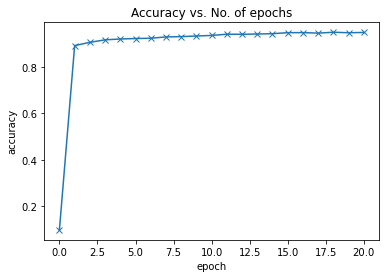

In [106]:
history = [result0] + history1 + history2
accuracies = [result['valid_accuracy'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

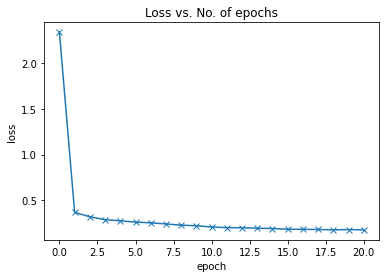

In [107]:
losses = [x['valid_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

In [108]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'valid_loss': 0.17076826095581055, 'valid_accuracy': tensor(0.9510)}

### Using GPU

In [110]:
### Get the device

def get_default_device():
    if torch.backends.mps.is_available():
        return torch.device('mps')
    else:
        return torch.device('cpu')

In [111]:
device = get_default_device()
device

device(type='mps')

In [114]:
## Transferring data to device

def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [115]:
### example
for images, _ in train_dl:
    print(images.device)
    images = to_device(images, device)
    print(images.device)
    break

cpu
mps:0


Finally, we define a `DeviceDataLoader` class to wrap our existing data loaders and move batches of data to the selected device. Interestingly, we don't need to extend an existing class to create a PyTorch datal oader. All we need is an `__iter__` method to retrieve batches of data and an `__len__` method to get the number of batches.

In [163]:
### Device dataloader class

class DeviceDataLoader:
    
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        for batch in self.dl:
            yield to_device(batch, self.device)
            
    def __len__(self):
        return len(self.dl)

In [117]:
### moving the dataloaders to device
train_loader = DeviceDataLoader(train_dl, device)
val_loader = DeviceDataLoader(valid_dl, device)

In [120]:
for xb, yb in val_loader:
    print('xb.device:', xb.device)
    print('yb.device:', yb.device)
    break

xb.device: mps:0
yb.device: mps:0


In [121]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        for batch in train_loader:
            model.train()
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        model.eval()
        with torch.inference_mode():
            result = evaluate(model, val_loader)
            model.epoch_end(epoch, result)
            history.append(result)
    return history

In [122]:
class MnistModel(nn.Module):
    """Feedfoward neural network with 1 hidden layer"""
    def __init__(self, in_size, hidden_size, out_size):
        super().__init__()
        # hidden layer
        self.linear1 = nn.Linear(in_size, hidden_size)
        # output layer
        self.linear2 = nn.Linear(hidden_size, out_size)
        
    def forward(self, xb):
        # Flatten the image tensors
        xb = xb.view(xb.size(0), -1)
        # Get intermediate outputs using hidden layer
        out = self.linear1(xb)
        # Apply activation function
        out = F.relu(out)
        # Get predictions using output layer
        out = self.linear2(out)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

In [123]:
input_size = 784
hidden_size = 32 # you can change this
num_classes = 10

In [131]:
model_1 = MnistModel(input_size, hidden_size=32, out_size=num_classes)

In [132]:
to_device(model_1, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [133]:
for t in model_1.parameters():
    print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [135]:
for images, labels in train_loader:
    outputs = model_1(images)
    loss = F.cross_entropy(outputs, labels)
    print('Loss:', loss.item())
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

Loss: 2.3366153240203857
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[-0.2058, -0.1670, -0.1813,  0.0377,  0.0394, -0.0043, -0.0098, -0.0090,
         -0.2359, -0.0244],
        [-0.2902, -0.1108, -0.1931,  0.0532,  0.1365,  0.0079, -0.0057, -0.0888,
         -0.1227, -0.1507]], device='mps:0')


/Users/shafinsaapel/tensorflow-test/env/lib/python3.8/site-packages/torch/_tensor_str.py:103: UserWarning: The operator 'aten::bitwise_and.Tensor_out' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/mps/MPSFallback.mm:11.)
  nonzero_finite_vals = torch.masked_select(tensor_view, torch.isfinite(tensor_view) & tensor_view.ne(0))


In [136]:
history = [evaluate(model_1, val_loader)]
history

[{'val_loss': 2.310445785522461, 'val_acc': 0.11025390774011612}]

In [137]:
history += fit(5, 0.5, model_1, train_loader, val_loader)

Epoch [0], val_loss: 0.2822, val_acc: 0.9125
Epoch [1], val_loss: 0.1741, val_acc: 0.9462
Epoch [2], val_loss: 0.1444, val_acc: 0.9569
Epoch [3], val_loss: 0.1511, val_acc: 0.9556
Epoch [4], val_loss: 0.1529, val_acc: 0.9530


In [139]:
history += fit(5, 0.1, model_1, train_loader, val_loader)

Epoch [0], val_loss: 0.1169, val_acc: 0.9667
Epoch [1], val_loss: 0.1154, val_acc: 0.9671
Epoch [2], val_loss: 0.1149, val_acc: 0.9656
Epoch [3], val_loss: 0.1140, val_acc: 0.9663
Epoch [4], val_loss: 0.1130, val_acc: 0.9673


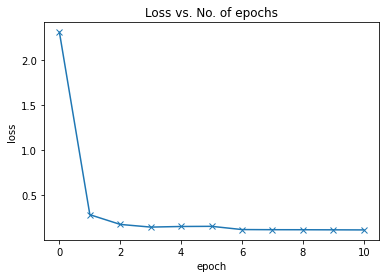

In [140]:
losses = [x['val_loss'] for x in history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs. No. of epochs');

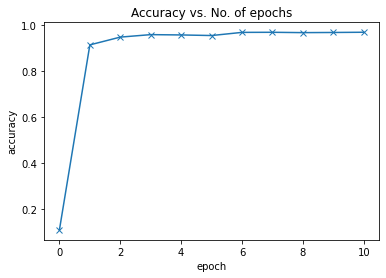

In [141]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

## Testing with individual images

While we have been tracking the overall accuracy of a model so far, it's also a good idea to look at model's results on some sample images. Let's test out our model with some images from the predefined test dataset of 10000 images. We begin by recreating the test dataset with the `ToTensor` transform.

In [143]:
len(test_dataset),len(test_loader)

(10000, 40)

In [152]:
def predict_image(img, model):
    print('Image shape: ', img.shape)
    print('Image reshaped for device: ', img.unsqueeze(0).shape)
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

**REsized image shape: (1,1,28,28)-> (batch(=1), image shape(=`1*28*28`))

Image shape:  torch.Size([1, 28, 28])
Image reshaped for device:  torch.Size([1, 1, 28, 28])
Label: 7 , Predicted: 7


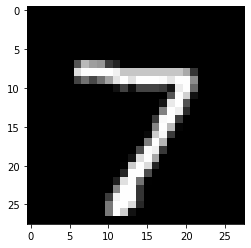

In [153]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model_1))

image shape:  torch.Size([1, 28, 28])
Image shape:  torch.Size([1, 28, 28])
Image reshaped for device:  torch.Size([1, 1, 28, 28])
Label: 4 , Predicted: 4


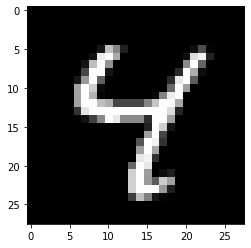

In [160]:
img, label = test_dataset[6]
print('image shape: ', img.shape)
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model_1))